In [129]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr

In [130]:
df = pd.read_csv("julio_catalogo_dia.csv")

In [131]:
df.head()

,Ad Account ID,Ad Account Name,Reporting starts,Reporting ends,Ad name,Ad delivery,Ad Set Name,Bid,Bid type,Ad set budget,...,Purchases conversion value,Mobile app purchases conversion value,Website purchases conversion value,Meta Purchase Conversion Value,Campaign ID,Page engagement,Post engagement,Post reactions,Post comments,CPC (cost per link click) (MXN)
0,920962708581993,albana_ad,7/30/2022,7/30/2022,Catalogo_Ad_Julio - Price,inactive,Catalogo_AdSet_Julio - Price,0,CPA,55,...,NaN,NaN,NaN,NaN,23851903914600173,49.0,49.0,1.0,NaN,0.40625
1,920962708581993,albana_ad,7/30/2022,7/30/2022,Catalogo_Ad_Julio_Copy,inactive,Catalogo_AdSet_Julio - Copy,0,CPA,55,...,NaN,NaN,NaN,NaN,23851903914600173,NaN,NaN,NaN,NaN,NaN
2,920962708581993,albana_ad,7/30/2022,7/30/2022,Catalogo_Ad_Julio,inactive,Catalogo_AdSet_Julio,0,CPA,55,...,NaN,NaN,NaN,NaN,23851903914600173,55.0,55.0,3.0,NaN,0.40500
3,920962708581993,albana_ad,7/29/2022,7/29/2022,Catalogo_Ad_Julio - Price,inactive,Catalogo_AdSet_Julio - Price,0,CPA,55,...,NaN,NaN,NaN,NaN,23851903914600173,166.0,166.0,2.0,NaN,0.34811
4,920962708581993,albana_ad,7/29/2022,7/29/2022,Catalogo_Ad_Julio_Copy,inactive,Catalogo_AdSet_Julio - Copy,0,CPA,55,...,NaN,NaN,NaN,NaN,23851903914600173,NaN,NaN,NaN,NaN,NaN


In [132]:
df.columns

Index(['Ad Account ID', 'Ad Account Name', 'Reporting starts',
       'Reporting ends', 'Ad name', 'Ad delivery', 'Ad Set Name', 'Bid',
       'Bid type', 'Ad set budget', 'Ad set budget type',
       'Last significant edit', 'Results', 'Result indicator', 'Reach',
       'Impressions', 'Cost per results', 'Quality ranking',
       'Engagement rate ranking', 'Conversion rate ranking',
       'Amount spent (MXN)', 'Ends', 'Result rate', 'Frequency', 'Link clicks',
       'Unique link clicks', 'Clicks (all)', 'Landing page views', 'Purchases',
       'Mobile app purchases', 'Website purchases', 'Meta Purchases',
       'Purchases conversion value', 'Mobile app purchases conversion value',
       'Website purchases conversion value', 'Meta Purchase Conversion Value',
       'Campaign ID', 'Page engagement', 'Post engagement', 'Post reactions',
       'Post comments', 'CPC (cost per link click) (MXN)'],
      dtype='object')

In [133]:
# Denifinir Calidadad 
pd.crosstab(df["Ad name"], df["Quality ranking"])


Quality ranking,-,Above average,Average,Below average - Bottom 35% of ads
Ad name,,,,
Catalogo_Ad_Julio,1,2,7,2
Catalogo_Ad_Julio - Price,7,0,5,0
Catalogo_Ad_Julio_Copy,7,1,1,3


In [134]:
# Frecuecnia total por cada Ad
df_temp = df[df.Frequency != 0]

df_temp.groupby("Ad name")["Frequency"].mean()

# Catalogo no repite personas

Ad name
Catalogo_Ad_Julio            1.031839
Catalogo_Ad_Julio - Price    1.028405
Catalogo_Ad_Julio_Copy       1.023114
Name: Frequency, dtype: float64

In [135]:
def corr_two(x1, y1):
    
    plt.clf()

    fig, ax = plt.subplots(3, 1, figsize = (13, 9))

    i = 0

    for name, temp_df in df.groupby("Ad name"):
        ax1 = sns.lineplot(data = temp_df, x = "Reporting starts", y = x1, ax = ax[i])
        ax2 = sns.lineplot(data = temp_df, x = "Reporting starts", y = y1, ax = ax[i])

        ax1.xaxis_inverted()
        ax2.xaxis_inverted()

        ax1.legend([x1, y1])
        ax1.set_title(name)

        i+=1

    plt.subplots_adjust(hspace=0.7)

    corr, _ = pearsonr(df[x1].fillna(0), df[y1].fillna(0))

    print(corr)

    sns.lmplot(data = df, x = x1, y = y1)
    

0.8748925877506896


<Figure size 432x288 with 0 Axes>

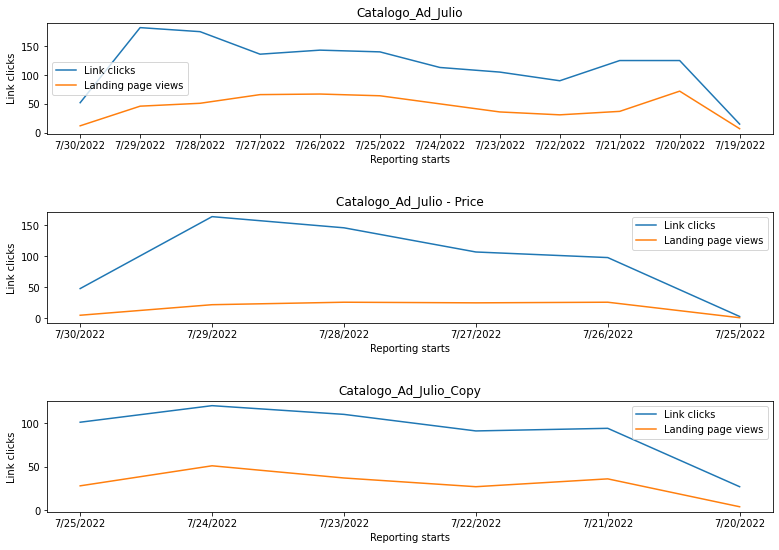

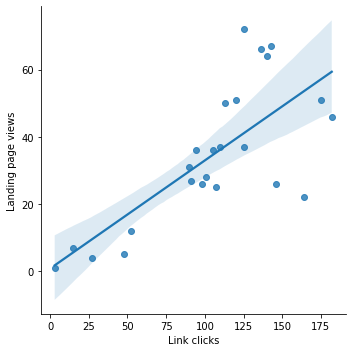

In [136]:
# Correlacion Link Clicks - Landing Page
corr_two("Link clicks", "Landing page views")

0.9759733298561403


<Figure size 432x288 with 0 Axes>

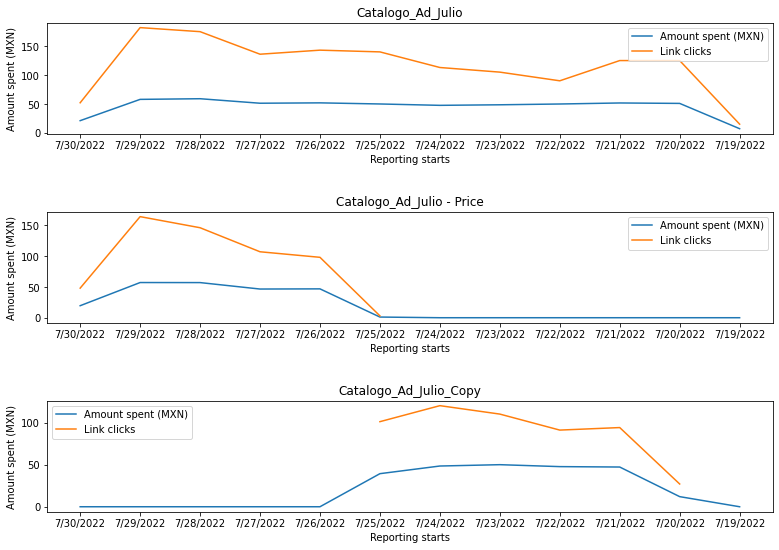

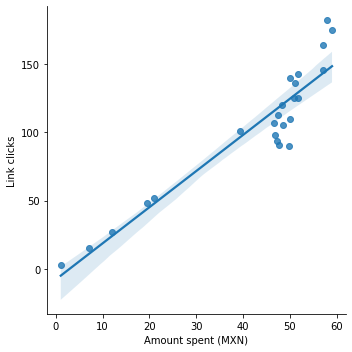

In [137]:
# Correlacion Gasto - Resultados(Link click)
corr_two("Amount spent (MXN)","Link clicks")

0.7042369684993737


<Figure size 432x288 with 0 Axes>

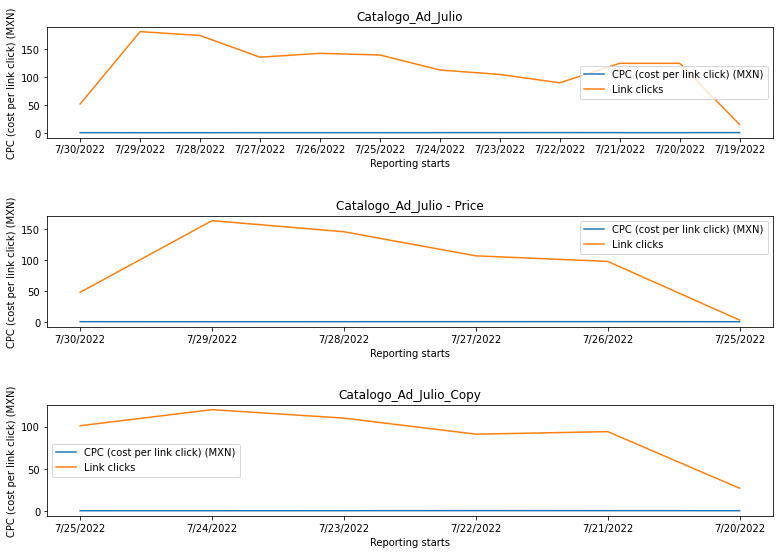

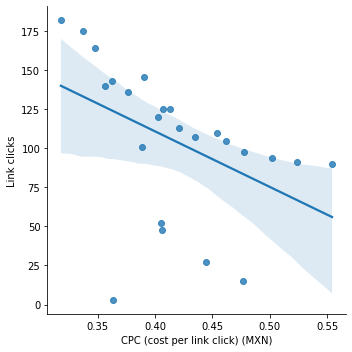

In [138]:
# Correlacion Link Clicks - Costo por resultado 
corr_two("CPC (cost per link click) (MXN)", "Link clicks")